<a href="https://colab.research.google.com/github/akhil2630/DSML-d30-Machine-learning/blob/main/Comprehensive_Assessment_Deep_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 1. Loading and Preprocessing
# Load the dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target


In [7]:
print(X.shape)

(442, 10)


In [8]:
print(X.info)

<bound method DataFrame.info of           age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.

In [5]:
# Displaying the first few rows of the dataset
print("Dataset Head:")
print(X.head())

Dataset Head:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [9]:
# Check for missing values
print("Missing values:\n", X.isnull().sum())

Missing values:
 age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


In [10]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Text(0.5, 1.0, 'Feature Correlations')

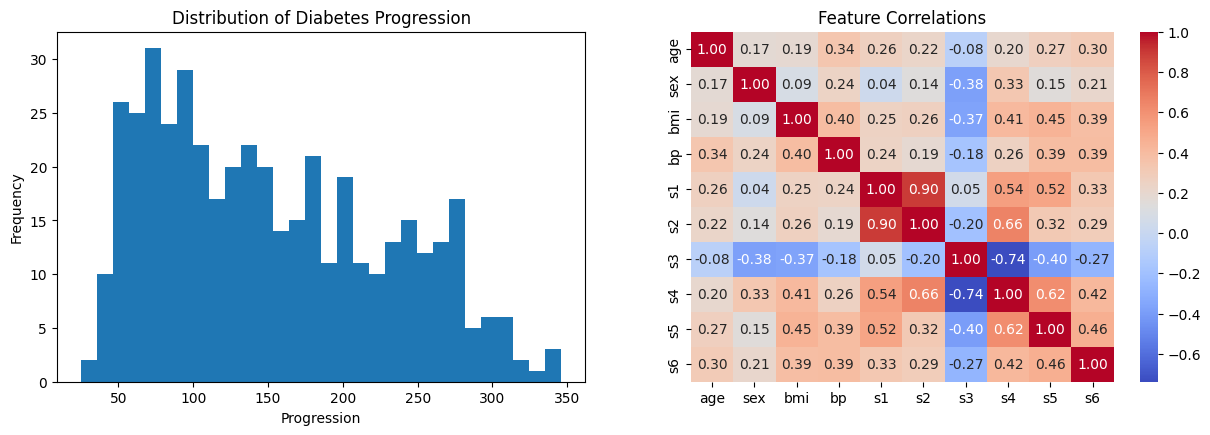

In [13]:
# 2. Exploratory Data Analysis
plt.figure(figsize=(15, 10))
# Distribution of target variable
plt.subplot(2, 2, 1)
plt.hist(y, bins=30)
plt.title('Distribution of Diabetes Progression')
plt.xlabel('Progression')
plt.ylabel('Frequency')
# Correlation heatmap
plt.subplot(2, 2, 2)
correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations')

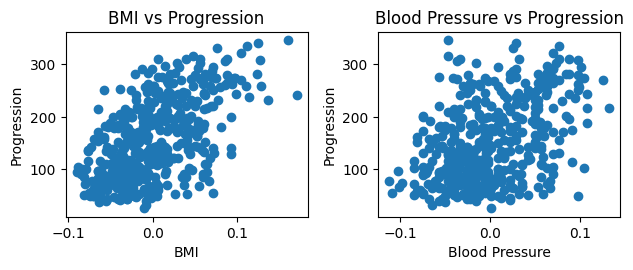

In [14]:
# Feature vs Target scatter plots
plt.subplot(2, 2, 3)
plt.scatter(X['bmi'], y)
plt.xlabel('BMI')
plt.ylabel('Progression')
plt.title('BMI vs Progression')

plt.subplot(2, 2, 4)
plt.scatter(X['bp'], y)
plt.xlabel('Blood Pressure')
plt.ylabel('Progression')
plt.title('Blood Pressure vs Progression')

plt.tight_layout()
plt.show()

In [20]:
# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to create and evaluate model
def create_evaluate_model(architecture, name="Model"):
    model = Sequential()

    # Add layers based on architecture
    for units, dropout in architecture:
        model.add(Dense(units, activation='relu'))
        if dropout > 0:
            model.add(Dropout(dropout))
    # Output layer
    model.add(Dense(1))

    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

       # Train model
    history = model.fit(
        X_train, y_train,
        epochs=200,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=0
    )
    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name} Results:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.4f}")

    return model, history, mse, r2

    # 4. Initial Model
initial_architecture = [
    (64, 0.2),
    (32, 0.1)
]

initial_model, initial_history, initial_mse, initial_r2 = create_evaluate_model(
    initial_architecture,
    "Initial Model"
)
# 5. Improved Model
improved_architecture = [
    (128, 0.3),
    (64, 0.2),
    (32, 0.1)
]

improved_model, improved_history, improved_mse, improved_r2 = create_evaluate_model(
    improved_architecture,
    "Improved Model"
)



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Initial Model Results:
Mean Squared Error: 2991.21
R² Score: 0.4354
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Improved Model Results:
Mean Squared Error: 2983.91
R² Score: 0.4368


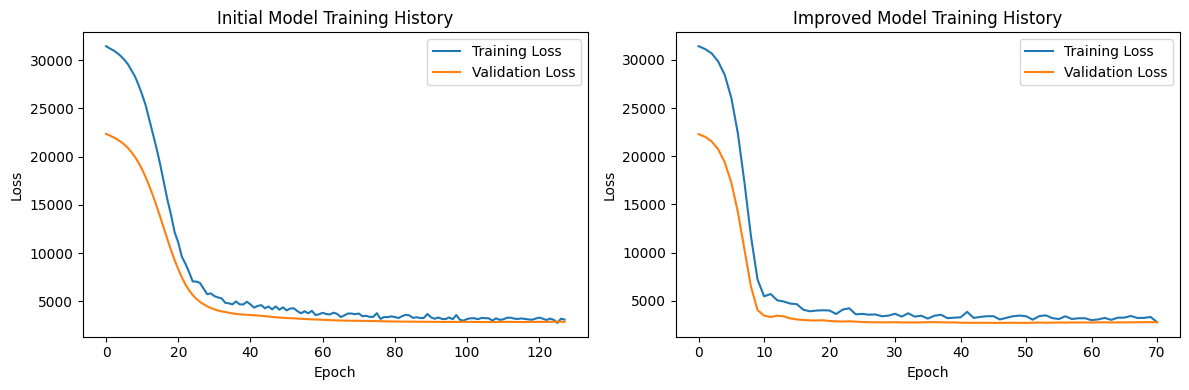

In [23]:
# Visualize training history for both models
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(initial_history.history['loss'], label='Training Loss')
plt.plot(initial_history.history['val_loss'], label='Validation Loss')
plt.title('Initial Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(improved_history.history['loss'], label='Training Loss')
plt.plot(improved_history.history['val_loss'], label='Validation Loss')
plt.title('Improved Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
# Print improvement comparison
print("\nModel Comparison:")
print(f"Initial Model R²: {initial_r2:.4f}")
print(f"Improved Model R²: {improved_r2:.4f}")
print(f"R² Improvement: {(improved_r2 - initial_r2):.4f}")


Model Comparison:
Initial Model R²: 0.4354
Improved Model R²: 0.4368
R² Improvement: 0.0014
